In [29]:
import matplotlib.pyplot as plt
import numpy as np
from dipy.io.image import load_nifti
import pandas as pd
import sklearn.cluster
import pathlib
from scipy.stats import norm, ttest_ind, iqr
from sklearn.mixture import GaussianMixture
import os

In [112]:
'''
Path to clean images segmented with slic
'''
path_to_control_slic = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/control_slic_classified/"

'''
Path to clean images segmented with kmeans
'''
path_to_control_kmeans = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/control_kmeans_classified/"

'''
Path to tumor images segmented with slic
'''
path_to_tumor_slic = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/slic_classified/"
'''
Path to tumor images segmented with kmeans
'''
path_to_tumor_kmeans = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/results/kmeans_classified/"

'''
Path to original clean image
'''
path_to_augmented_clean = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/seg_images/"
'''
Path to original library image
'''
path_to_lib = "/N/project/laidel_el_mcv/LAIDEL-MRI-tumor-id/lib/MICCAI_BraTS2020_TrainingData/"

In [113]:
'''
Record means of all tumor images 
'''

def gather_tumor_loop(path):  
    tolerance = 0.15
    
    data_id = path.parts[len(path.parts)-1]
    data_id = os.path.splitext(data_id)[0]
    print(data_id)
    #classified
    classified_img = np.load(path)
    #original image 
    og_image_path = path_to_lib+data_id+"/"+data_id+"_flair.nii"
    og_image, affine, im = load_nifti(og_image_path, return_img=True)
    #normalized original image
    max_val = np.max(og_image)
    min_val = np.min(og_image)
    og_image_norm = (og_image - min_val)/(max_val - min_val)
    
    #extract tumor
    tumor_label=np.max(classified_img)
    print(tumor_label)
    tumor = og_image_norm[classified_img==tumor_label]
    tumor_mean = np.mean(tumor)
    print("tumor mean ", tumor_mean)
    #extract nontumor
    nontumor=og_image_norm[classified_img != tumor_label]
    nontumor= nontumor[nontumor > tolerance]
    nontumor_mean= np.mean(nontumor)
    print("nontumor mean ", nontumor_mean)
    
    return np.array([tumor_mean, nontumor_mean])

In [114]:
'''
Record means of all nontumor images 
'''

def gather_clean_loop(path):  
    tolerance = 0.15
    data_id = path.parts[len(path.parts)-1]
    
    print(data_id)
    #classified
    classified_img = np.load(path)
    #original image 
    og_image_path = path_to_augmented_clean+data_id
    og_image = np.load(og_image_path)
    #normalized original image
    max_val = np.max(og_image)
    min_val = np.min(og_image)
    og_image_norm = (og_image - min_val)/(max_val - min_val)
    #extract tumor
    tumor_label=np.max(classified_img)
    print("tumor label", tumor_label)
    tumor = og_image_norm[classified_img==tumor_label]
    tumor_mean = np.mean(tumor)
    print("tumor mean ", tumor_mean)
    #extract nontumor
    nontumor=og_image_norm[classified_img != tumor_label]
    nontumor= nontumor[nontumor > tolerance]
    nontumor_mean= np.mean(nontumor)
    print("nontumor mean", nontumor_mean)
    
    return np.array([tumor_mean, nontumor_mean])

# SLIC clean image

In [115]:


#list comprehension
clean_slic_metrics = [gather_clean_loop(path) for path in pathlib.Path(path_to_control_slic).iterdir()]


BraTS20_Training_101_clean.npy
tumor label 1.0
tumor mean  0.18119142596098362
nontumor mean 0.17749342561643322
BraTS20_Training_349_clean.npy
tumor label 1.0
tumor mean  0.3219879
nontumor mean 0.22056945
BraTS20_Training_127_clean.npy
tumor label 1.0
tumor mean  0.2703538680484916
nontumor mean 0.22271010703959213
BraTS20_Training_035_clean.npy
tumor label 1.0
tumor mean  0.22365748382808937
nontumor mean 0.18654714981349513
BraTS20_Training_111_clean.npy
tumor label 1.0
tumor mean  0.22121296893560682
nontumor mean 0.1874923559707387
BraTS20_Training_299_clean.npy
tumor label 1.0
tumor mean  0.4004142298778056
nontumor mean 0.270243846982355
BraTS20_Training_215_clean.npy
tumor label 1.0
tumor mean  0.3035700675033677
nontumor mean 0.2335421310652005
BraTS20_Training_097_clean.npy
tumor label 1.0
tumor mean  0.2410950169746408
nontumor mean 0.21342515824611064
BraTS20_Training_352_clean.npy
tumor label 1.0
tumor mean  0.574457
nontumor mean 0.4014351
BraTS20_Training_145_clean.npy


tumor label 1.0
tumor mean  0.3165284710779655
nontumor mean 0.2624168083888928
BraTS20_Training_249_clean.npy
tumor label 1.0
tumor mean  0.34696174931847884
nontumor mean 0.24522991287958368
BraTS20_Training_324_clean.npy
tumor label 1.0
tumor mean  0.38441545235765295
nontumor mean 0.2654040488539401
BraTS20_Training_108_clean.npy
tumor label 1.0
tumor mean  0.2765572636821445
nontumor mean 0.23778903640979396
BraTS20_Training_110_clean.npy
tumor label 1.0
tumor mean  0.32517643475230523
nontumor mean 0.2658125180980253
BraTS20_Training_283_clean.npy
tumor label 1.0
tumor mean  0.3004620683689473
nontumor mean 0.23044178634023602
BraTS20_Training_066_clean.npy
tumor label 1.0
tumor mean  0.30097800625831805
nontumor mean 0.240361789017373
BraTS20_Training_167_clean.npy
tumor label 1.0
tumor mean  0.43221467220585924
nontumor mean 0.3070007851042509
BraTS20_Training_206_clean.npy
tumor label 1.0
tumor mean  0.4033146685944703
nontumor mean 0.27210558403305085
BraTS20_Training_275_cle

tumor label 1.0
tumor mean  0.3502755267548159
nontumor mean 0.3019053107233332
BraTS20_Training_181_clean.npy
tumor label 1.0
tumor mean  0.4655472985228948
nontumor mean 0.3085163514384677
BraTS20_Training_242_clean.npy
tumor label 1.0
tumor mean  0.3078673064057831
nontumor mean 0.24258251633657127
BraTS20_Training_099_clean.npy
tumor label 1.0
tumor mean  0.35097233255479815
nontumor mean 0.2878161643048973
BraTS20_Training_259_clean.npy
tumor label 1.0
tumor mean  0.38049144509159866
nontumor mean 0.29889172744552805
BraTS20_Training_112_clean.npy
tumor label 1.0
tumor mean  0.22447822703679124
nontumor mean 0.19242187655240983
BraTS20_Training_228_clean.npy
tumor label 1.0
tumor mean  0.5381718800760645
nontumor mean 0.3243482647083088
BraTS20_Training_150_clean.npy
tumor label 1.0
tumor mean  0.48786273164092764
nontumor mean 0.39378098349938345
BraTS20_Training_071_clean.npy
tumor label 1.0
tumor mean  0.2990325166364874
nontumor mean 0.22978558567369692
BraTS20_Training_279_cl

tumor label 1.0
tumor mean  0.2478794019237955
nontumor mean 0.21080495602897928
BraTS20_Training_336_clean.npy
tumor label 1.0
tumor mean  0.40404797
nontumor mean 0.3139007
BraTS20_Training_219_clean.npy
tumor label 1.0
tumor mean  0.40959490282923827
nontumor mean 0.2895441097466632
BraTS20_Training_188_clean.npy
tumor label 1.0
tumor mean  0.5349383538275037
nontumor mean 0.3351313900274733
BraTS20_Training_140_clean.npy
tumor label 1.0
tumor mean  0.38508050957675694
nontumor mean 0.32158761322133533
BraTS20_Training_135_clean.npy
tumor label 1.0
tumor mean  0.4117822755170506
nontumor mean 0.28151940993961583
BraTS20_Training_334_clean.npy
tumor label 1.0
tumor mean  0.31811604972428553
nontumor mean 0.2556319420949334
BraTS20_Training_141_clean.npy
tumor label 1.0
tumor mean  0.2649077602231425
nontumor mean 0.21602635534845263
BraTS20_Training_132_clean.npy
tumor label 1.0
tumor mean  0.2866449744181257
nontumor mean 0.23611986002102672
BraTS20_Training_270_clean.npy
tumor labe

tumor label 1.0
tumor mean  0.25397054095451027
nontumor mean 0.2181346238204334
BraTS20_Training_157_clean.npy
tumor label 1.0
tumor mean  0.37636865088182875
nontumor mean 0.2850992939589955
BraTS20_Training_187_clean.npy
tumor label 1.0
tumor mean  0.2718853227423413
nontumor mean 0.2184366532180776
BraTS20_Training_342_clean.npy
tumor label 1.0
tumor mean  0.38099402
nontumor mean 0.31405118
BraTS20_Training_326_clean.npy
tumor label 1.0
tumor mean  0.3551678486322881
nontumor mean 0.28173639627653324
BraTS20_Training_026_clean.npy
tumor label 1.0
tumor mean  0.21265407608698722
nontumor mean 0.18694228794109455
BraTS20_Training_358_clean.npy
tumor label 1.0
tumor mean  0.4948034
nontumor mean 0.33858728
BraTS20_Training_272_clean.npy
tumor label 1.0
tumor mean  0.4079462637438352
nontumor mean 0.2874073835235956
BraTS20_Training_260_clean.npy
tumor label 1.0
tumor mean  0.17026649381375505
nontumor mean 0.15979959242320152
BraTS20_Training_151_clean.npy
tumor label 1.0
tumor mean 

In [116]:
clean_slic_metrics = np.asarray(clean_slic_metrics)

In [117]:
clean_slic_dif_arr = clean_slic_metrics[:,0]-clean_slic_metrics[:,1]

In [118]:
np.mean(clean_slic_dif_arr)

0.08301253594044167

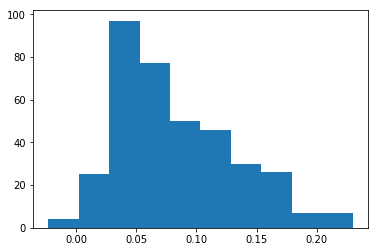

In [119]:
plt.figure()
plt.hist(clean_slic_dif_arr)
plt.show()

# SLIC tumor image

In [120]:
#list comprehension
tumor_slic_metrics = [gather_tumor_loop(path) for path in pathlib.Path(path_to_tumor_slic).iterdir()]

BraTS20_Training_021
1.0
tumor mean  0.24568714786473103
nontumor mean  0.19435307446253205
BraTS20_Training_236
1.0
tumor mean  0.4908250008900916
nontumor mean  0.323226156070681
BraTS20_Training_269
1.0
tumor mean  0.4853244260437693
nontumor mean  0.3263375693025112
BraTS20_Training_104
1.0
tumor mean  0.35692370675130747
nontumor mean  0.18644054117074507
BraTS20_Training_272
1.0
tumor mean  0.6505026525376699
nontumor mean  0.40281389247808075
BraTS20_Training_194
1.0
tumor mean  0.3550527451706582
nontumor mean  0.25408067666977824
BraTS20_Training_063
1.0
tumor mean  0.3111863290000289
nontumor mean  0.25377351807342463
BraTS20_Training_123
1.0
tumor mean  0.41305836556375314
nontumor mean  0.1961582374351447
BraTS20_Training_360
1.0
tumor mean  0.5912701
nontumor mean  0.36286992
BraTS20_Training_133
1.0
tumor mean  0.5394313336829679
nontumor mean  0.3163589250610303
BraTS20_Training_320
1.0
tumor mean  0.3143909790747722
nontumor mean  0.23758845252443342
BraTS20_Training_29

1.0
tumor mean  0.4801773094037215
nontumor mean  0.2526677311597103
BraTS20_Training_232
1.0
tumor mean  0.33395446167033627
nontumor mean  0.2479372270707925
BraTS20_Training_012
1.0
tumor mean  0.36878852233924286
nontumor mean  0.20054206401112
BraTS20_Training_046
1.0
tumor mean  0.23459891409878353
nontumor mean  0.19646042695505436
BraTS20_Training_342
1.0
tumor mean  0.4590038
nontumor mean  0.3241461
BraTS20_Training_125
1.0
tumor mean  0.36250223746323595
nontumor mean  0.1853978824153856
BraTS20_Training_090
1.0
tumor mean  0.5064505321484909
nontumor mean  0.20289703221847408
BraTS20_Training_014
1.0
tumor mean  0.45422060139849657
nontumor mean  0.24974400389055712
BraTS20_Training_113
1.0
tumor mean  0.5644907137575844
nontumor mean  0.26989447282850304
BraTS20_Training_217
1.0
tumor mean  0.5519890445156332
nontumor mean  0.27192043108479036
BraTS20_Training_309
1.0
tumor mean  0.3902480658005705
nontumor mean  0.2762065659421401
BraTS20_Training_241
1.0
tumor mean  0.71

nontumor mean  0.28339988179993425
BraTS20_Training_202
1.0
tumor mean  0.45135938916118246
nontumor mean  0.2821730690930937
BraTS20_Training_067
1.0
tumor mean  0.4899600221988235
nontumor mean  0.23101928926861953
BraTS20_Training_147
1.0
tumor mean  0.4519188445999497
nontumor mean  0.33746257917804295
BraTS20_Training_096
1.0
tumor mean  0.34152746601305217
nontumor mean  0.1822291412045265
BraTS20_Training_099
1.0
tumor mean  0.34755565957436013
nontumor mean  0.2838146796179716
BraTS20_Training_020
1.0
tumor mean  0.3882025594878475
nontumor mean  0.21245503146910474
BraTS20_Training_156
1.0
tumor mean  0.7295898054901064
nontumor mean  0.3954002131131476
BraTS20_Training_128
1.0
tumor mean  0.220243069516121
nontumor mean  0.18540692356515937
BraTS20_Training_097
1.0
tumor mean  0.5042896644164236
nontumor mean  0.23583778604675978
BraTS20_Training_295
1.0
tumor mean  0.46462582060541263
nontumor mean  0.3505522267253531
BraTS20_Training_077
1.0
tumor mean  0.3965230777478057
n

1.0
tumor mean  0.29953654539011665
nontumor mean  0.22282823251146766
BraTS20_Training_215
1.0
tumor mean  0.5667664561885182
nontumor mean  0.28183236313176124
BraTS20_Training_170
1.0
tumor mean  0.6070313034433085
nontumor mean  0.33980583021099314
BraTS20_Training_238
1.0
tumor mean  0.7694577467870614
nontumor mean  0.2616960634067122
BraTS20_Training_175
1.0
tumor mean  0.5852183728118813
nontumor mean  0.3643706415876272
BraTS20_Training_151
1.0
tumor mean  0.38551914771656975
nontumor mean  0.31491817762449476
BraTS20_Training_044
1.0
tumor mean  0.24441225457054594
nontumor mean  0.1989898617852605
BraTS20_Training_333
1.0
tumor mean  0.6467186050323405
nontumor mean  0.31068050067193204
BraTS20_Training_359
1.0
tumor mean  0.35043475
nontumor mean  0.27986857
BraTS20_Training_108
1.0
tumor mean  0.5037241452220743
nontumor mean  0.17573044394151194
BraTS20_Training_213
1.0
tumor mean  0.5010917445366183
nontumor mean  0.2692487373227343
BraTS20_Training_176
1.0
tumor mean  0

In [121]:
tumor_slic_metrics = np.asarray(tumor_slic_metrics)

In [122]:
tumor_slic_dif_arr = tumor_slic_metrics[:,0]-tumor_slic_metrics[:,1]

In [123]:
np.min(tumor_slic_dif_arr)

-0.0002736070198079976

In [124]:
np.mean(tumor_slic_dif_arr)

0.17792719626502532

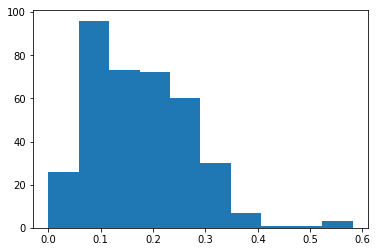

In [125]:
plt.figure()
plt.hist(tumor_slic_dif_arr)
plt.show()

# SLIC compare

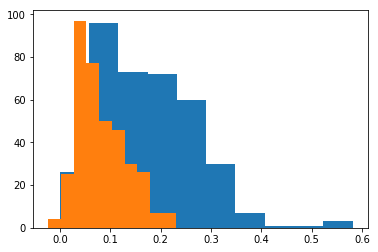

In [126]:
plt.figure()
plt.hist(tumor_slic_dif_arr)
plt.hist(clean_slic_dif_arr)
plt.show()

# Kmeans nontumor

In [128]:
'''
Record means of all nontumor images 
'''

def gather_kmeans_clean_loop(path):  
    tolerance = 0.15
    data_id = path.parts[len(path.parts)-1]
    
    print(data_id)
    #classified
    classified_img = np.load(path)
    #original image 
    og_image_path = path_to_augmented_clean+data_id
    og_image = np.load(og_image_path)
    #normalized original image
    max_val = np.max(og_image)
    min_val = np.min(og_image)
    og_image_norm = (og_image - min_val)/(max_val - min_val)
    #extract tumor
    tumor_label=np.max(classified_img)
    print("tumor label", tumor_label)
    tumor = og_image_norm[classified_img==tumor_label]
    tumor_mean = np.mean(tumor)
    print("tumor mean ", tumor_mean)
    #extract nontumor
    nontumor=og_image_norm[classified_img != tumor_label]
    nontumor= nontumor[nontumor > tolerance]
    nontumor_mean= np.mean(nontumor)
    print("nontumor mean", nontumor_mean)
    
    return np.array([tumor_mean, nontumor_mean])

In [129]:
#list comprehension
clean_kmeans_metrics = [gather_kmeans_clean_loop(path) for path in pathlib.Path(path_to_control_kmeans).iterdir()]


BraTS20_Training_101_clean.npy
tumor label 3
tumor mean  0.14869197148462304
nontumor mean 0.21172001400946924
BraTS20_Training_349_clean.npy
tumor label 3
tumor mean  0.2882021
nontumor mean 0.29353026
BraTS20_Training_127_clean.npy
tumor label 3
tumor mean  0.12700472720884606
nontumor mean 0.27330385104093474
BraTS20_Training_035_clean.npy
tumor label 3
tumor mean  0.2102597700085385
nontumor mean 0.19831139799775607
BraTS20_Training_111_clean.npy
tumor label 3
tumor mean  0.2722901541070503
nontumor mean 0.18900429419175693
BraTS20_Training_299_clean.npy
tumor label 3
tumor mean  0.453161141619627
nontumor mean 0.34112506744195864
BraTS20_Training_215_clean.npy
tumor label 3
tumor mean  0.28320539184169086
nontumor mean 0.32353655641512113
BraTS20_Training_097_clean.npy
tumor label 3
tumor mean  0.12321995464852607
nontumor mean 0.24028749441930267
BraTS20_Training_352_clean.npy
tumor label 3
tumor mean  0.6180847
nontumor mean 0.403878
BraTS20_Training_145_clean.npy
tumor label 3


tumor label 3
tumor mean  0.4509561185672325
nontumor mean 0.3402595011110783
BraTS20_Training_108_clean.npy
tumor label 3
tumor mean  0.2516414112242026
nontumor mean 0.29140755650056455
BraTS20_Training_110_clean.npy
tumor label 3
tumor mean  0.15758065626985787
nontumor mean 0.3051061370430383
BraTS20_Training_283_clean.npy
tumor label 3
tumor mean  0.14492890878219072
nontumor mean 0.30759855351148013
BraTS20_Training_066_clean.npy
tumor label 3
tumor mean  0.33157323574742203
nontumor mean 0.2394446959793642
BraTS20_Training_167_clean.npy
tumor label 3
tumor mean  0.2544590115427462
nontumor mean 0.4446761409798893
BraTS20_Training_206_clean.npy
tumor label 3
tumor mean  0.2025261349788101
nontumor mean 0.41683588744374345
BraTS20_Training_275_clean.npy
tumor label 3
tumor mean  0.24847815387845604
nontumor mean 0.42033791775108015
BraTS20_Training_207_clean.npy
tumor label 3
tumor mean  0.17405617656738853
nontumor mean 0.32388554950549264
BraTS20_Training_161_clean.npy
tumor lab

tumor label 3
tumor mean  0.30228172092326955
nontumor mean 0.36057533576421685
BraTS20_Training_259_clean.npy
tumor label 3
tumor mean  0.22518510097956382
nontumor mean 0.3773360737740331
BraTS20_Training_112_clean.npy
tumor label 3
tumor mean  0.11248913632435537
nontumor mean 0.20732026703236156
BraTS20_Training_228_clean.npy
tumor label 3
tumor mean  0.487802297309646
nontumor mean 0.5305299441590784
BraTS20_Training_150_clean.npy
tumor label 3
tumor mean  0.346874067556532
nontumor mean 0.49965824115580537
BraTS20_Training_071_clean.npy
tumor label 3
tumor mean  0.26327058812972065
nontumor mean 0.25136800826308286
BraTS20_Training_279_clean.npy
tumor label 3
tumor mean  0.21450299036767922
nontumor mean 0.30449426015626374
BraTS20_Training_203_clean.npy
tumor label 3
tumor mean  0.38265840713184535
nontumor mean 0.41583523318166266
BraTS20_Training_296_clean.npy
tumor label 3
tumor mean  0.11936240483674214
nontumor mean 0.2517524506037453
BraTS20_Training_032_clean.npy
tumor la

tumor label 3
tumor mean  0.19725683611234182
nontumor mean 0.4216985711657095
BraTS20_Training_334_clean.npy
tumor label 3
tumor mean  0.3598407827985005
nontumor mean 0.27467490733561545
BraTS20_Training_141_clean.npy
tumor label 3
tumor mean  0.31073534881498605
nontumor mean 0.23391702483584886
BraTS20_Training_132_clean.npy
tumor label 3
tumor mean  0.33335806849060806
nontumor mean 0.25620929382136104
BraTS20_Training_270_clean.npy
tumor label 3
tumor mean  0.2949139970578015
nontumor mean 0.4732798692466365
BraTS20_Training_234_clean.npy
tumor label 3
tumor mean  0.1243776061906349
nontumor mean 0.41620493610817966
BraTS20_Training_199_clean.npy
tumor label 3
tumor mean  0.341821223024134
nontumor mean 0.24958844747757056
BraTS20_Training_170_clean.npy
tumor label 3
tumor mean  0.41003060444073636
nontumor mean 0.3060632709308486
BraTS20_Training_325_clean.npy
tumor label 3
tumor mean  0.32423579792810536
nontumor mean 0.2517981853819874
BraTS20_Training_067_clean.npy
tumor labe

tumor label 3
tumor mean  0.464994114258649
nontumor mean 0.36722232990711134
BraTS20_Training_260_clean.npy
tumor label 3
tumor mean  0.17654473872404966
nontumor mean 0.15443662979526163
BraTS20_Training_151_clean.npy
tumor label 3
tumor mean  0.2276269349019126
nontumor mean 0.36899606151175407
BraTS20_Training_073_clean.npy
tumor label 3
tumor mean  0.30107479113539254
nontumor mean 0.2111866371657641
BraTS20_Training_178_clean.npy
tumor label 3
tumor mean  0.4479000863152723
nontumor mean 0.33540281761755053
BraTS20_Training_118_clean.npy
tumor label 3
tumor mean  0.24709476621985943
nontumor mean 0.3004874799211498
BraTS20_Training_341_clean.npy
tumor label 3
tumor mean  0.41685137
nontumor mean 0.45796546
BraTS20_Training_229_clean.npy
tumor label 3
tumor mean  0.2140400899761361
nontumor mean 0.39060249671896735
BraTS20_Training_056_clean.npy
tumor label 3
tumor mean  0.3571683219591698
nontumor mean 0.2718462355196075
BraTS20_Training_251_clean.npy
tumor label 3
tumor mean  0.

In [130]:
clean_kmeans_metrics = np.asarray(clean_kmeans_metrics)

In [131]:
clean_kmeans_dif_arr = clean_kmeans_metrics[:,0]-clean_kmeans_metrics[:,1]

In [132]:
np.mean(clean_kmeans_dif_arr)

-0.037959818198231

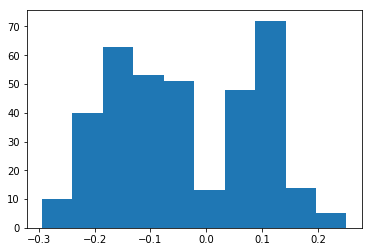

In [133]:
plt.figure()
plt.hist(clean_kmeans_dif_arr)
plt.show()

# Kmeans tumor

In [134]:
'''
Record means of all tumor images 
'''

def gather_tumor_kmeans_loop(path):  
    tolerance = 0.15
    
    data_id = path.parts[len(path.parts)-1]
    data_id = os.path.splitext(data_id)[0]
    data_id = data_id[0:-11]
    print(data_id)
    #classified
    classified_img = np.load(path)
    #original image 
    og_image_path = path_to_lib+data_id+"/"+data_id+"_flair.nii"
    og_image, affine, im = load_nifti(og_image_path, return_img=True)
    #normalized original image
    max_val = np.max(og_image)
    min_val = np.min(og_image)
    og_image_norm = (og_image - min_val)/(max_val - min_val)
    
    #extract tumor
    tumor_label=np.max(classified_img)
    print(tumor_label)
    tumor = og_image_norm[classified_img==tumor_label]
    tumor_mean = np.mean(tumor)
    print("tumor mean ", tumor_mean)
    #extract nontumor
    nontumor=og_image_norm[classified_img != tumor_label]
    nontumor= nontumor[nontumor > tolerance]
    nontumor_mean= np.mean(nontumor)
    print("nontumor mean ", nontumor_mean)
    
    return np.array([tumor_mean, nontumor_mean])

In [135]:
#list comprehension
tumor_kmeans_metrics = [gather_tumor_kmeans_loop(path) for path in pathlib.Path(path_to_tumor_kmeans).iterdir()]

BraTS20_Training_071
2
tumor mean  0.5147150111026312
nontumor mean  0.25478733718604935
BraTS20_Training_343
2
tumor mean  0.7161966
nontumor mean  0.384187
BraTS20_Training_061
2
tumor mean  0.8189136544473041
nontumor mean  0.2345450581210398
BraTS20_Training_261
2
tumor mean  0.7566273943435428
nontumor mean  0.3910463917560181
BraTS20_Training_067
2
tumor mean  0.5054579130312897
nontumor mean  0.23018086882907401
BraTS20_Training_278
2
tumor mean  0.5218582678616225
nontumor mean  0.3551976395921681
BraTS20_Training_287
3
tumor mean  0.4444309629805864
nontumor mean  0.3350434216944247
BraTS20_Training_298
1
tumor mean  0.5434962636674124
nontumor mean  0.4009913137660826
BraTS20_Training_179
2
tumor mean  0.29246390061737687
nontumor mean  0.17227703440685185
BraTS20_Training_227
2
tumor mean  0.3571050671109389
nontumor mean  0.2653955092401695
BraTS20_Training_009
2
tumor mean  0.38816910819973627
nontumor mean  0.1922971786406609
BraTS20_Training_349
2
tumor mean  0.5387138
n

2
tumor mean  0.26948185951468984
nontumor mean  0.19545147537753935
BraTS20_Training_333
2
tumor mean  0.6577824206460341
nontumor mean  0.31021169511731617
BraTS20_Training_134
1
tumor mean  0.3944321399455508
nontumor mean  0.29279853300499015
BraTS20_Training_289
2
tumor mean  0.5763500186516659
nontumor mean  0.2956216039317526
BraTS20_Training_085
3
tumor mean  0.41430799843198385
nontumor mean  0.22223564581113314
BraTS20_Training_167
2
tumor mean  0.5591082763069034
nontumor mean  0.40240153429377595
BraTS20_Training_319
2
tumor mean  0.7150851143009588
nontumor mean  0.4495387830557183
BraTS20_Training_213
2
tumor mean  0.5823277214450543
nontumor mean  0.443606687933411
BraTS20_Training_354
2
tumor mean  0.581516
nontumor mean  0.411986
BraTS20_Training_340
2
tumor mean  0.5263929
nontumor mean  0.40310657
BraTS20_Training_101
2
tumor mean  0.390715194047308
nontumor mean  0.18619541294278572
BraTS20_Training_331
2
tumor mean  0.67627978194345
nontumor mean  0.351567258468286

2
tumor mean  0.5754464208920923
nontumor mean  0.39648044617226175
BraTS20_Training_332
3
tumor mean  0.5603261654483179
nontumor mean  0.32735017516213805
BraTS20_Training_224
2
tumor mean  0.49269054426440123
nontumor mean  0.19345015742055313
BraTS20_Training_236
2
tumor mean  0.5017048333303249
nontumor mean  0.32293491036224464
BraTS20_Training_357
2
tumor mean  0.4832376
nontumor mean  0.35281146
BraTS20_Training_345
3
tumor mean  0.72887415
nontumor mean  0.4238603
BraTS20_Training_270
2
tumor mean  0.5845328893216164
nontumor mean  0.42851509881206584
BraTS20_Training_129
3
tumor mean  0.39841597738986306
nontumor mean  0.2800205964454787
BraTS20_Training_169
1
tumor mean  0.43969467208772955
nontumor mean  0.3060718748330836
BraTS20_Training_177
1
tumor mean  0.41663861299901034
nontumor mean  0.3146328643863864
BraTS20_Training_191
3
tumor mean  0.3785031402901414
nontumor mean  0.22468286880831395
BraTS20_Training_139
3
tumor mean  0.5098342355489733
nontumor mean  0.376663

0
tumor mean  0.0665499362952479
nontumor mean  nan
BraTS20_Training_087
1
tumor mean  0.42380224363914226
nontumor mean  0.30147897292706605
BraTS20_Training_080
2
tumor mean  0.43496492134250386
nontumor mean  0.22017116476593707
BraTS20_Training_316
3
tumor mean  0.49913544624600636
nontumor mean  0.29247668606354377
BraTS20_Training_325
3
tumor mean  0.33502426535361635
nontumor mean  0.2556600926948047
BraTS20_Training_113
2
tumor mean  0.5768827229177991
nontumor mean  0.26829688956313524
BraTS20_Training_228
3
tumor mean  0.6559240249700935
nontumor mean  0.48582003942439117
BraTS20_Training_308
2
tumor mean  0.46714987121103574
nontumor mean  0.3662390069016661
BraTS20_Training_237
3
tumor mean  0.7281582130929861
nontumor mean  0.4305165236446783
BraTS20_Training_083
2
tumor mean  0.5611877786140935
nontumor mean  0.22342275197058575
BraTS20_Training_075
3
tumor mean  0.6921885151740292
nontumor mean  0.2125691714322229
BraTS20_Training_321
2
tumor mean  0.552033555413635
nont

In [136]:
tumor_kmeans_metrics = np.asarray(tumor_kmeans_metrics)

In [137]:
tumor_kmeans_dif_arr = tumor_kmeans_metrics[:,0]-tumor_kmeans_metrics[:,1]

In [138]:
tumor_kmeans_dif_arr

array([0.25992767, 0.33200958, 0.5843686 , 0.365581  , 0.27527704,
       0.16666063, 0.10938754, 0.14250495, 0.12018687, 0.09170956,
       0.19587193, 0.24699232, 0.1003125 , 0.26682208, 0.12675423,
       0.15472618, 0.36224929, 0.0480652 , 0.10060104, 0.09337598,
       0.21824677, 0.1333473 , 0.13188397, 0.10721214, 0.23551142,
       0.170025  , 0.09882884, 0.24761168, 0.12419613, 0.0812391 ,
       0.30139015, 0.25896519, 0.1171312 , 0.09984166, 0.30785416,
       0.24517965, 0.1618094 , 0.19468297, 0.39122259, 0.34780687,
       0.1274891 , 0.41051128, 0.18281382, 0.20846739, 0.33116182,
       0.25550813, 0.27556955, 0.31196332, 0.10510085, 0.13006765,
       0.15143558, 0.19913048, 0.31451835, 0.24025502, 0.10225311,
       0.07900857, 0.12694617, 0.11941568, 0.30887219, 0.08636452,
       0.17724276, 0.13424581, 0.24677907, 0.29802975, 0.26790588,
       0.25892824, 0.24299174, 0.19403652, 0.16700758, 0.23923345,
       0.10977147, 0.09072437, 0.35635112, 0.35619878, 0.08232

In [139]:
tumor_kmeans_dif_arr = tumor_kmeans_dif_arr[tumor_kmeans_dif_arr< np.inf]

/N/soft/rhel7/anaconda/python3.7/2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [140]:
np.mean(tumor_kmeans_dif_arr)

0.20803394933758929

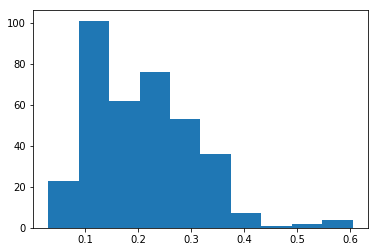

In [141]:
plt.figure()
plt.hist(tumor_kmeans_dif_arr)
plt.show()

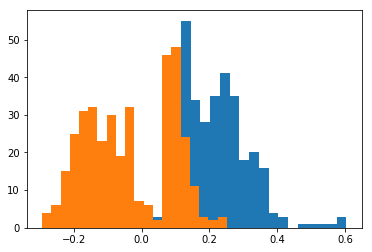

In [142]:
plt.figure()
plt.hist(tumor_kmeans_dif_arr, bins=20)
plt.hist(clean_kmeans_dif_arr, bins=20)
plt.show()